In [1]:
# Import libraries
import numpy as np
import scipy as sp
from scipy.stats import entropy, gamma, norm, uniform
import matplotlib.pyplot as plt

In [2]:
# TODO:
# Information 구할 때 자꾸 기대하지 않은 값을 반환하는 오류 수정
class SampleData:
    def __init__(self, start, end, n_data):
        assert(n_data > 0)
        self.n_data = n_data
        self.xs = np.linspace(start, end, self.n_data)
    
    def uniform_pdf(self):
        return uniform(loc=self.xs[0], scale=self.xs[-1]).pdf(self.xs)
    
    def normalized_gamma_pdf(self, k, loc=0., scale=1.):
        gamma_pdf = gamma(k, loc=loc, scale=scale).pdf(self.xs)
        return gamma_pdf / np.sum(gamma_pdf)
    
    def normalized_normal_pdf(self, loc=0., scale=1.):
        normal_pdf = norm(loc=loc, scale=scale).pdf(self.xs)
        return normal_pdf / np.sum(normal_pdf)

    def information(self, k=None, loc=0., scale=1., distribution='uniform'):
        if distribution == 'uniform':
            px = self.uniform_pdf()
        elif distribution == 'gamma':
            assert(k)
            px = self.normalized_gamma_pdf(k, loc, scale)
        elif distribution == 'normal':
            px = self.normalized_normal_pdf(loc, scale)
        else:
            return None
        return -np.log(px)
    
    # Deprecated
    def kl_divergence_information(self, px, qx):
        return np.log(px / qx)
        #return self.cross_information(px, qx) - self.information(px)
    
    def entropy(self, px):
        return np.sum(-px * np.log(px))
    
    def cross_entropy(self, px, qx):
        return np.sum(-px * np.log(qx))
    
    def kl_divergence(self, px, qx):
        return self.cross_entropy(px, qx) - self.entropy(px)

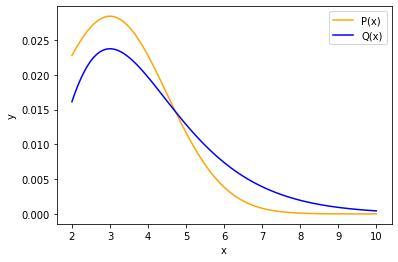

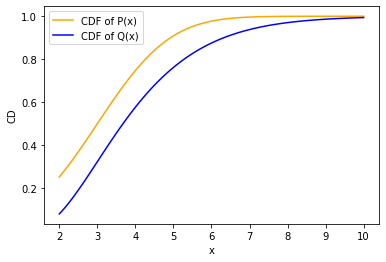

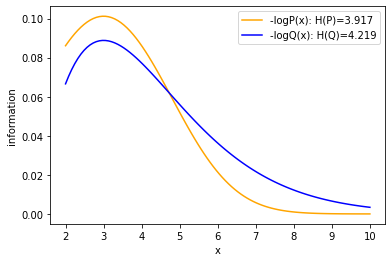

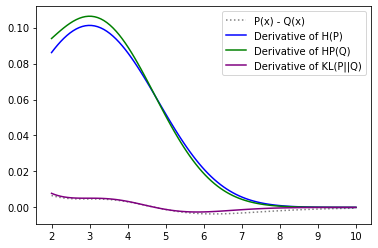

In [4]:
def normalized_normal_pdf(x, loc=0., scale=1.):
        normal_pdf = norm(loc=loc, scale=scale).pdf(x)
        return normal_pdf / np.sum(normal_pdf)

def normalized_gamma_pdf(x, k, loc=0., scale=1.):
    gamma_pdf = gamma(a=k, loc=loc, scale=scale).pdf(x)
    return gamma_pdf / np.sum(gamma_pdf)

def test_function(x, a, b):
    return a * x + b

def test():
    xs = SampleData(2, 10, 100)
    ys_normal = xs.normalized_normal_pdf(loc=3, scale=1.5)
    ys_gamma = xs.normalized_gamma_pdf(k=3, loc=1)
    
    plt.figure(1)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(xs.xs, ys_normal, ls='-', color='orange', label='P(x)')
    plt.plot(xs.xs, ys_gamma, ls='-', color='blue', label='Q(x)')
    plt.legend()

    plt.figure(2)
    plt.xlabel('x')
    plt.ylabel('CD')
    plt.plot(xs.xs, norm(3, 1.5).cdf(xs.xs), ls='-', color='orange', label='CDF of P(x)')
    plt.plot(xs.xs, gamma(3, 1).cdf(xs.xs), ls='-', color='blue', label='CDF of Q(x)')
    plt.legend()

    info_normal = xs.information(loc=3, scale=1.5, distribution='normal')
    info_gamma = xs.information(k=3, loc=1, distribution='gamma')
    cross_info_normal_gamma = xs.information(ys_gamma)
    #kl_divergence_info_normal_gamma = xs.kl_divergence_information(ys_normal, ys_gamma)

    # plt.figure(3)
    # plt.xlabel('x')
    # plt.ylabel('information')
    # plt.plot(xs.xs, np.log(1/ys_normal), ls='-', color='orange', label=f'Information of P(x): H(P)={entropy(ys_normal):.4}')
    # plt.plot(xs.xs, np.log(1/ys_gamma), ls='-', color='blue', label=f'Information of Q(x): H(Q)={entropy(ys_gamma):.4}')
    # plt.plot(xs.xs, np.log(1/ys_normal)- np.log(1/ys_gamma), ls='-', color='green', label='I(P) - I(Q)')
    # plt.legend()

    plt.figure(4)
    plt.xlabel('x')
    plt.ylabel('information')
    plt.plot(xs.xs, ys_normal * np.log(1/ys_normal), ls='-', color='orange', label=f'-logP(x): H(P)={entropy(ys_normal):.4}')
    plt.plot(xs.xs, ys_gamma * np.log(1/ys_gamma), ls='-', color='blue', label=f'-logQ(x): H(Q)={entropy(ys_gamma):.4}')
    plt.legend()

    plt.figure(5)
    plt.plot(xs.xs, ys_normal - ys_gamma, ls=':', color='grey', label='P(x) - Q(x)')
    plt.plot(xs.xs, ys_normal * np.log(1/ys_normal), ls='-', color='blue', label='Derivative of H(P)')
    plt.plot(xs.xs, ys_normal * np.log(1/ys_gamma), ls='-', color='green', label='Derivative of HP(Q)')
    #plt.plot(xs.xs, ys_normal * kl_divergence_info_normal_gamma, ls='-', color='green')
    plt.plot(xs.xs, ys_normal * np.log(ys_normal / ys_gamma), ls='-', color='purple', label='Derivative of KL(P||Q)')
    plt.legend()

test()